/var/folders/qm/vrbv8c9d3rl27g_3jymb8fdw0000gn/T/ipykernel_80541/1520835424.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(stats_to_plot.keys()), y=list(stats_to_plot.values()), ax=axes[0], palette='viridis')
/var/folders/qm/vrbv8c9d3rl27g_3jymb8fdw0000gn/T/ipykernel_80541/1520835424.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_avg.index, y=cat_avg.values, ax=axes[1], palette='magma')


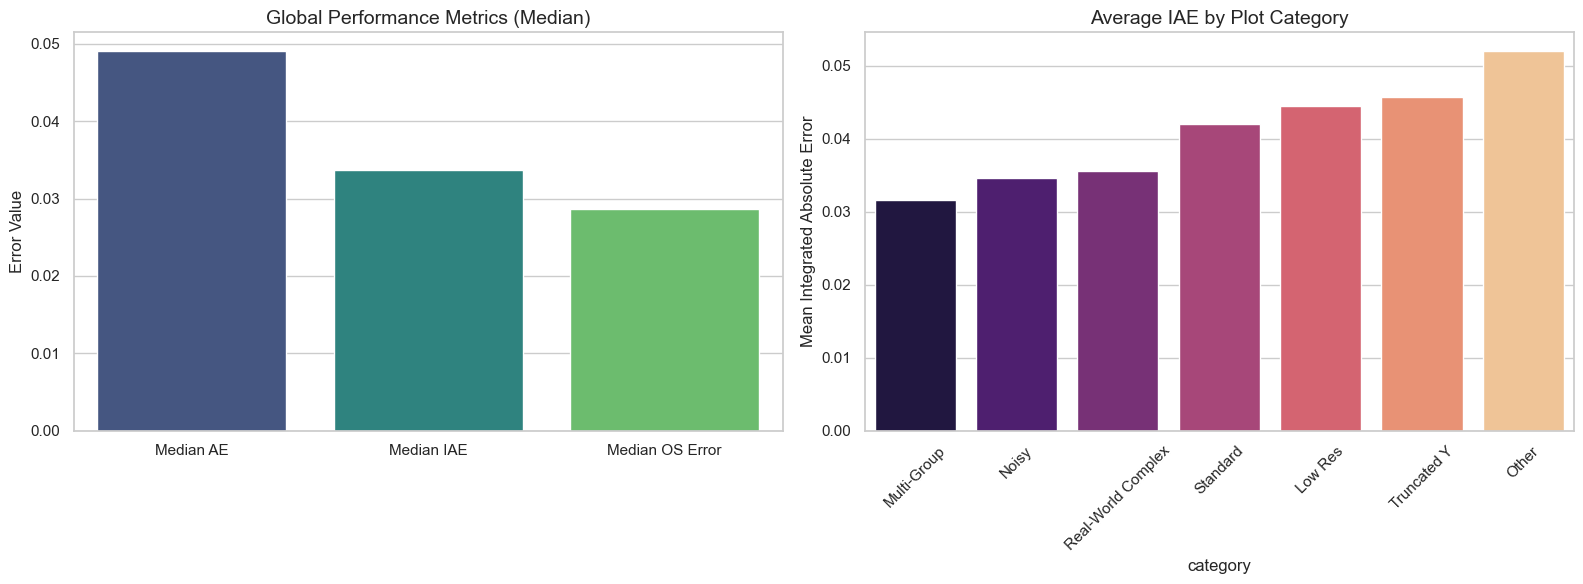

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../eval_logs/20260203_012649_results.json'
with open(file_path, 'r') as f:
    eval_data = json.load(f)

df = pd.DataFrame(eval_data['individual_results'])

def categorize_plot(name):
    name = name.lower()
    if 'low_resolution' in name: return 'Low Res'
    if 'noisy' in name: return 'Noisy'
    if 'multi-group' in name: return 'Multi-Group'
    if 'truncated' in name: return 'Truncated Y'
    if 'complex' in name: return 'Real-World Complex'
    if 'standard' in name: return 'Standard'
    return 'Other'

df['category'] = df['plot_name'].apply(categorize_plot)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

summary = eval_data['summary_statistics']
stats_to_plot = {
    'Median AE': summary['median_ae']['median'],
    'Median IAE': summary['iae']['median'],
    'Median OS Error': summary['median_os_error']['median']
}

sns.barplot(x=list(stats_to_plot.keys()), y=list(stats_to_plot.values()), ax=axes[0], palette='viridis')
axes[0].set_title('Global Performance Metrics (Median)', fontsize=14)
axes[0].set_ylabel('Error Value')

cat_avg = df.groupby('category')['integrated_absolute_error'].mean().sort_values()
sns.barplot(x=cat_avg.index, y=cat_avg.values, ax=axes[1], palette='magma')
axes[1].set_title('Average IAE by Plot Category', fontsize=14)
axes[1].set_ylabel('Mean Integrated Absolute Error')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()